# Model Analyses
### Figure Content:
 - **Main Text Figure 1a:** Climatological mean map of $p$CO$_2$ anomaly at 75 meters depth over the ROMS domain
 - **Main Text Figure 3a - 3d:** Maps of future acidification in the California Current following RCP 8.5 emissions scenario
 - **Main Text Figure 3e:** Time series of atmospheric and oceanic $p$CO$_2$ over the 21st century
 ------------

In [1]:
import sys
import importlib

import numpy as np
import pandas as pd
import xarray as xr

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.ticker as mticker
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Open files and select data

In [2]:
file_historic_12km = '/home/mmstoll/raid/Data/CCModel_Historic_Data/usw12_avg_ctracers_vintp_ROMS.nc'
file_modern_12km = '/home/mmstoll/raid/Data/CCModel_Modern_Data/usw12_avg_ctracers_vintp.nc'
file_future_12km = '/home/mmstoll/raid/Data/CCModel_Future_Data/usw12_avg_ctracers_vintp.nc'
file_future_omega_12km = '/raid/mmstoll/Data/CCModel_Future_Data/omega_fut12_PYCO2SYS.nc'

Import functions to clean up model output:

In [3]:
sys.path.insert(1, '../Functions')
import Output_Cleanup_Functions as open_files
importlib.reload(open_files)

<module 'Output_Cleanup_Functions' from '/raid/mmstoll/Code/Industrial_Era_OA_Code/../Functions/Output_Cleanup_Functions.py'>

In [4]:
ds_modern, ds_historic, month_list_modern, month_list_historic = open_files.open_files_12vs12(file_modern_12km, file_historic_12km)
ds_future, month_list_future = open_files.open_files_fut12(file_future_12km)
depth_list = open_files.depths()

In [5]:
ds_future_omega = xr.open_dataset(file_future_omega_12km)
ds_future_omega = ds_future_omega.rename_vars(name_dict={'__xarray_dataarray_variable__':'ARAG_SAT_STATE'})

#### Specify start and end dates for historic, modern, and future model simulations

In [6]:
date_index_modern_start = month_list_modern.index('December 2000')
date_index_modern_end = month_list_modern.index('November 2007')
date_index_historic_start = month_list_historic.index('December 1897')
date_index_historic_end = month_list_historic.index('November 1904')
date_index_future_start = month_list_future.index('December 2100')
date_index_future_end = month_list_future.index('November 2107')

# Figures

### Main Text Figure 1a
Climatological mean map of $p$CO$_2$ anomaly at 75 meters depth over the ROMS domain

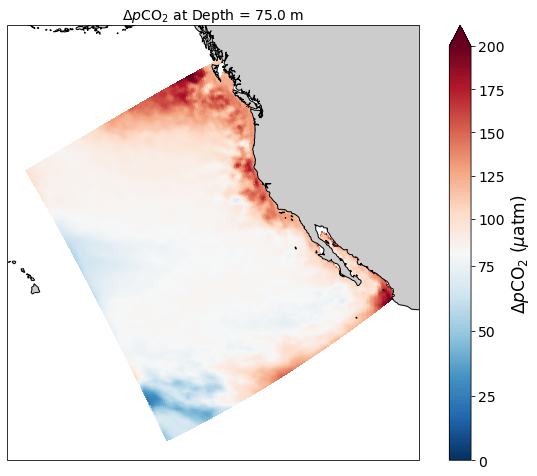

In [7]:
parameter = 'pco2'
depth_index = 3

#DEFINE PLOT PROPERTIES
fig = plt.figure(figsize = (11,8))
proj = ccrs.LambertConformal(central_longitude = -127, central_latitude = 37)
ax = fig.add_subplot(projection = proj)

title_size = 14
axis_size = 12

#SPECIFY DATA       
mod = ds_modern[parameter][date_index_modern_start:date_index_modern_end+1,
                               depth_index,10:390,:].mean(dim=('time')) 
hist = ds_historic[parameter][date_index_modern_start:date_index_modern_end+1,
                                  depth_index,10:390,:].mean(dim=('time')) 
diff = mod-hist
    
#COLOR BAR SPECIFICATIONS
cmin = 0
cmax = 200
cmap = matplotlib.cm.get_cmap('RdBu_r')
offset = mcolors.TwoSlopeNorm(vmin=cmin, vcenter = 80, vmax=cmax)

#PLOT DATA
model_plot = diff.plot(cmap = cmap, transform = ccrs.PlateCarree(),
                       x = 'lon_rho', y = 'lat_rho', add_colorbar = False, norm = offset) 
    
ax.set_title('$\Delta$$p$CO$_2$ at Depth = ' + str(depth_list[depth_index])+' m', size = title_size)
coast_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='0.8')
ax.add_feature(coast_50m)
    
#ADD COLOR BAR
cbar = fig.colorbar(model_plot, norm = offset, extend = 'max')
cbar.ax.tick_params(labelsize=14)
cbar.set_label('$\Delta$$p$CO$_2$ ($\mu$atm)', size = 17)

### Main Text Figure 3a - 3d
Maps of future acidification in the California Current following RCP 8.5 emissions scenario

In [8]:
parameters = ['ph','ARAG_SAT_STATE','ph','pco2']

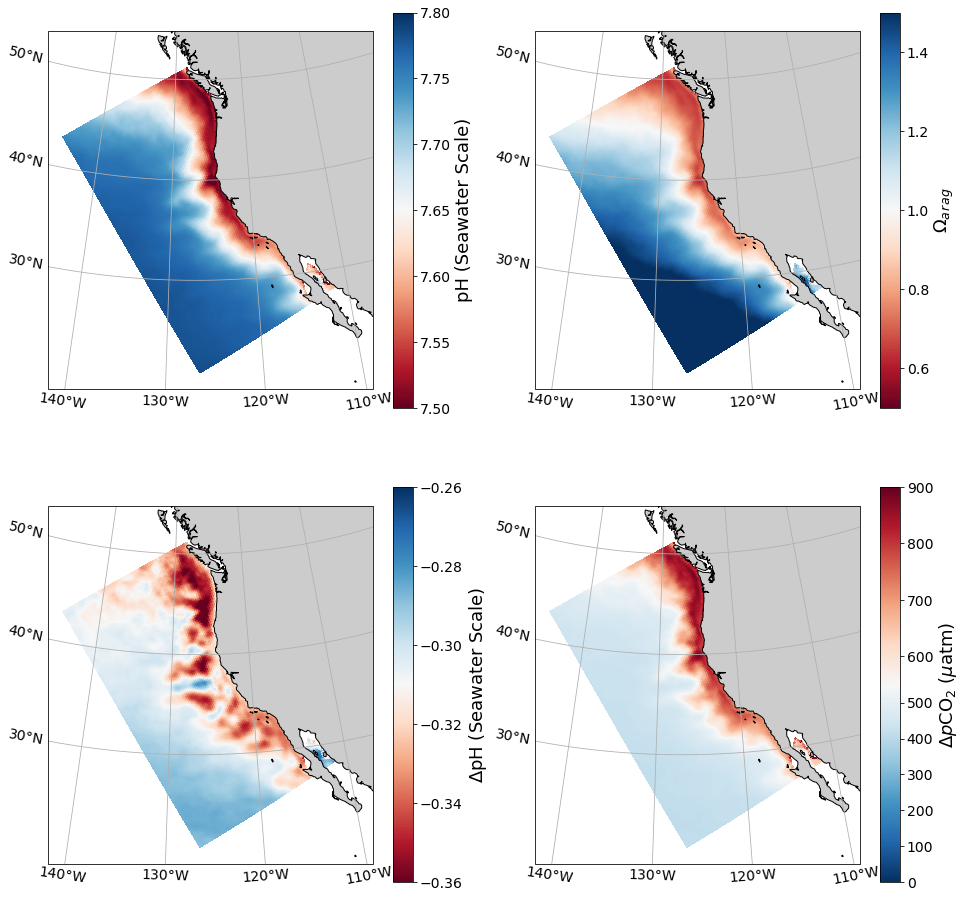

In [9]:
fig = plt.figure(figsize = (16,16))

crs0 = ccrs.PlateCarree()
proj = ccrs.LambertConformal(central_longitude = -127, central_latitude = 37)

nrows = 2
ncols = 2
depth_index = 3 #Corresponds with 75 m depth
cmap = matplotlib.cm.get_cmap('RdBu')

for i in range(1,5):
    ax = fig.add_subplot(nrows, ncols, i, projection = proj)
    
    if i==1:
        parameter = parameters[i-1]
        label = 'pH (Seawater Scale)'

        ds_fut = ds_future[parameter][date_index_future_start:date_index_future_end+1,
                                      depth_index,100:350,150:].mean(dim=('time'))
        model_plot = ds_fut.plot(cmap = cmap, transform = crs0, add_colorbar=False,
                                 vmin = 7.5, vmax = 7.8, x = 'lon_rho', y = 'lat_rho') 
    if i==2:
        parameter = parameters[i-1]
        label = '$\Omega$$_a$$_r$$_a$$_g$'

        ds_fut = ds_future_omega[parameter].mean(dim=('time'))
        model_plot = ds_fut.plot(cmap = cmap, transform = crs0, add_colorbar=False,
                                 vmin = .5, vmax = 1.5, x = 'lon_rho', y = 'lat_rho') 
        
    if i>2:
        parameter = parameters[i-1]
        label = '$\Delta$pH (Seawater Scale)'
        
        ds_fut = ds_future[parameter][date_index_future_start:date_index_future_end+1,
                                      depth_index,100:350,150:].mean(dim=('time'))
        ds_mod = ds_modern[parameter][date_index_modern_start:date_index_modern_end+1,
                                      depth_index,100:350,150:].mean(dim=('time'))
        diff = ds_fut - ds_mod
        model_plot = diff.plot(cmap = cmap, transform = crs0, add_colorbar=False,
                               vmin = -.36, vmax = -.26, x = 'lon_rho', y = 'lat_rho')
        
        if i>3:
            cmap = matplotlib.cm.get_cmap('RdBu_r')
            label = '$\Delta$$p$CO$_2$ ($\mu$atm)'
            #Centered at 550 uatm to reflect atmospheric rise in CO2 over 21st century
            offset = mcolors.TwoSlopeNorm(vmin=0, vcenter = 550, vmax=900)
            model_plot = diff.plot(cmap = cmap, transform = crs0, add_colorbar=False,
                                   norm = offset, x = 'lon_rho', y = 'lat_rho')
    
    #COLOR BAR
    cbar = fig.colorbar(model_plot)
    cbar.ax.tick_params(labelsize=14)
    cbar.set_label(label, size = 18)
    
    ax.set_title('')
    coast_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m', edgecolor='k', facecolor='0.8')
    ax.add_feature(coast_50m)
    
    #GRIDLINES
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True, x_inline=False, y_inline=False)
    gl.xlabel_style = {'size': 14, 'color': 'k'}
    gl.ylabel_style = {'size': 14, 'color': 'k'}
    gl.right_labels = False
    gl.ylocator = mticker.FixedLocator([30,40,50])
    gl.xlocator = mticker.FixedLocator([-140,-130,-120,-110])
    gl.top_labels = False

### Main Text Figure 3e
Time series of atmospheric and oceanic $p$CO$_2$ over the 21st century

In [10]:
atmospheric_CO2_historic = pd.read_csv('/raid/mmstoll/Data/CCModel_Historic_Data/Atmospheric_Global_Annual_CO2_IAC_Switzerland.csv')
atmospheric_dates = pd.to_datetime(atmospheric_CO2_historic['year'][1885:2020], format = '%Y')
atmospheric_CO2_RCP8 = [369,379,389,416,449,489,540,603,677,758,845,936]
years = ['2000','2005','2010','2020','2030','2040','2050','2060','2070','2080','2090','2100']
years = np.array(years, dtype='datetime64[s]')

In [11]:
eras_list = [ds_historic, ds_modern, ds_future]
names_list = ['historic', 'modern', 'future']
colors_list = ['dodgerblue','orange','seagreen']
markers_list = ['o', '^', 'd']
labels_list = ['Surface $p$CO$_2$', '$p$CO$_2$ 50-75 meters', '$p$CO$_2$ 100-150 meters']

depths_list = [0,1,2,4,4,7]
parameter = 'pco2'

(array([-47482., -32872., -18263.,  -3653.,  10957.,  25567.,  40177.,
         54786.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

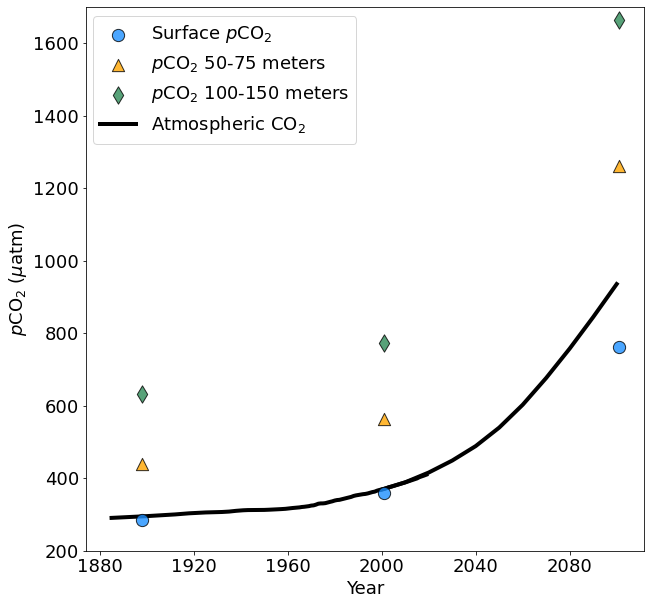

In [12]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)

for era, name in zip(eras_list, names_list):
    counter = 0

    for i, marker, color, label in zip(range(0,3), markers_list, colors_list, labels_list):
        coastal_xarray = []
        start_depth = depths_list[counter]
        end_depth = depths_list[counter+1]

        ds = era[parameter][date_index_modern_start:date_index_modern_end+1,
                            start_depth:end_depth,150:350,0:].mean(dim=('time','depth'))
        
        for row in ds['eta_rho'][0:-1]:
            indices_list = np.argwhere(np.isnan(np.array(ds[row])))
            x_index = int(indices_list[0])
            coastal_xarray.append(ds[int(row), x_index-8:x_index].values.astype(float))
            xarray = ds[int(row):int(row+2), x_index-8:x_index]
        
        avg_value = np.mean(coastal_xarray)
        
        if name == 'historic':
            ax.scatter(era[parameter]['time'][date_index_modern_start].values,
                       avg_value, s=150, alpha = 0.8, marker = marker,
                       color = color, edgecolor = 'k', zorder = 10, label = label)

        else:
            ax.scatter(era[parameter]['time'][date_index_modern_start].values,
                       avg_value, s=150, alpha = 0.8, marker = marker,
                       color = color, edgecolor = 'k', zorder = 10)
        counter+=2
        
#ATMOSPHERIC CO2
ax.plot(years, atmospheric_CO2_RCP8, color = 'black', linewidth = 4)
ax.plot(atmospheric_dates.values, atmospheric_CO2_historic['data_mean_global'][1885:2020], linewidth = 4,
        zorder = 4, color = 'black', label = 'Atmospheric CO$_2$') 

ax.set_ylabel('$p$CO$_2$ ($\mu$atm)', size = 18)
ax.set_xlabel('Year', size = 18)
ax.legend(bbox_to_anchor=(.5, 1),prop={'size': 18})
ax.set_ylim(200,1700)
plt.yticks(size = 18)
plt.xticks(size = 18)